In [1]:
# import libraries
import numpy as np
import scipy as scp
import matplotlib as mpl
import sklearn as skl
import matplotlib.pyplot as plt
import pandas
import re

%matplotlib inline


In [2]:
train_data_frame = pandas.read_csv("data\\train.csv", sep=",", quotechar='"')
test = pandas.read_csv("data\\test.csv", sep=",", quotechar='"')

# Extract year, day and hour and create "Year", "Month", "Hour" columns in train_data_frame

def parse_date(date):
    """
    maps date formatted as in training set as a list of [Year, Month, Hour]
    :param date: date as formatted in training set
    :retuap oject that can extract of Year, Month and Hour
    """
    mo=re.search(r'^([0-9]{4})-([0-9]{2})-[0-9]{2}\s+([0-9]{2}):[0-9]{2}:[0-9]{2}$',date)
    timelist = map(int,(mo.group(1),mo.group(2),mo.group(3)))
    return map(int,(mo.group(1),mo.group(2),mo.group(3)))

# Extract 'Year', 'Month' and 'Hour' columns for later use
train_data_frame['Year'],train_data_frame['Month'],train_data_frame['Hour'] = zip(*train_data_frame.loc[:,'Dates'].map(parse_date))
test['Year'],test['Month'],test['Hour'] = zip(*test.loc[:,'Dates'].map(parse_date))

In [ ]:
"""
Spot outliers by printing the following data frames and changing X and Y authorized values
train_data_frame[['X','Y']][train_data_frame.Y<90]
train_data_frame[['X','Y']][train_data_frame.Y==40]
"""

In [4]:
# geographically no anomaly detected except the following outliers
outliersX = np.where(train_data_frame.X >-121)[0]
outliersY = np.where(train_data_frame.Y > 38)[0]
print(len(outliersX))

# clean data : delete data outliers from train_data_frame
train_data_frame_ret = train_data_frame[train_data_frame.Y < 38]
print(train_data_frame_ret.shape)

67
(877982, 12)


In [5]:
# Create a dictionnary to replace hours (too dense) by hour slots
# Group hours by 4 our slots ranging from 0 (hour 0 to 3) to 5 (hour20 to 23)

dicthour = {}
for i in range (24):
    if i==0:
        dicthour[i]=0
    else:
        dicthour[i]=int(i/4)
print(dict)

# Replace hours by hourslots in column "Hour"
train_data_frame_ret["Hour"].replace(dicthour, inplace=True)


<class 'dict'>


D:\programmation\logiciel\anaconda\lib\site-packages\pandas\core\generic.py:2859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


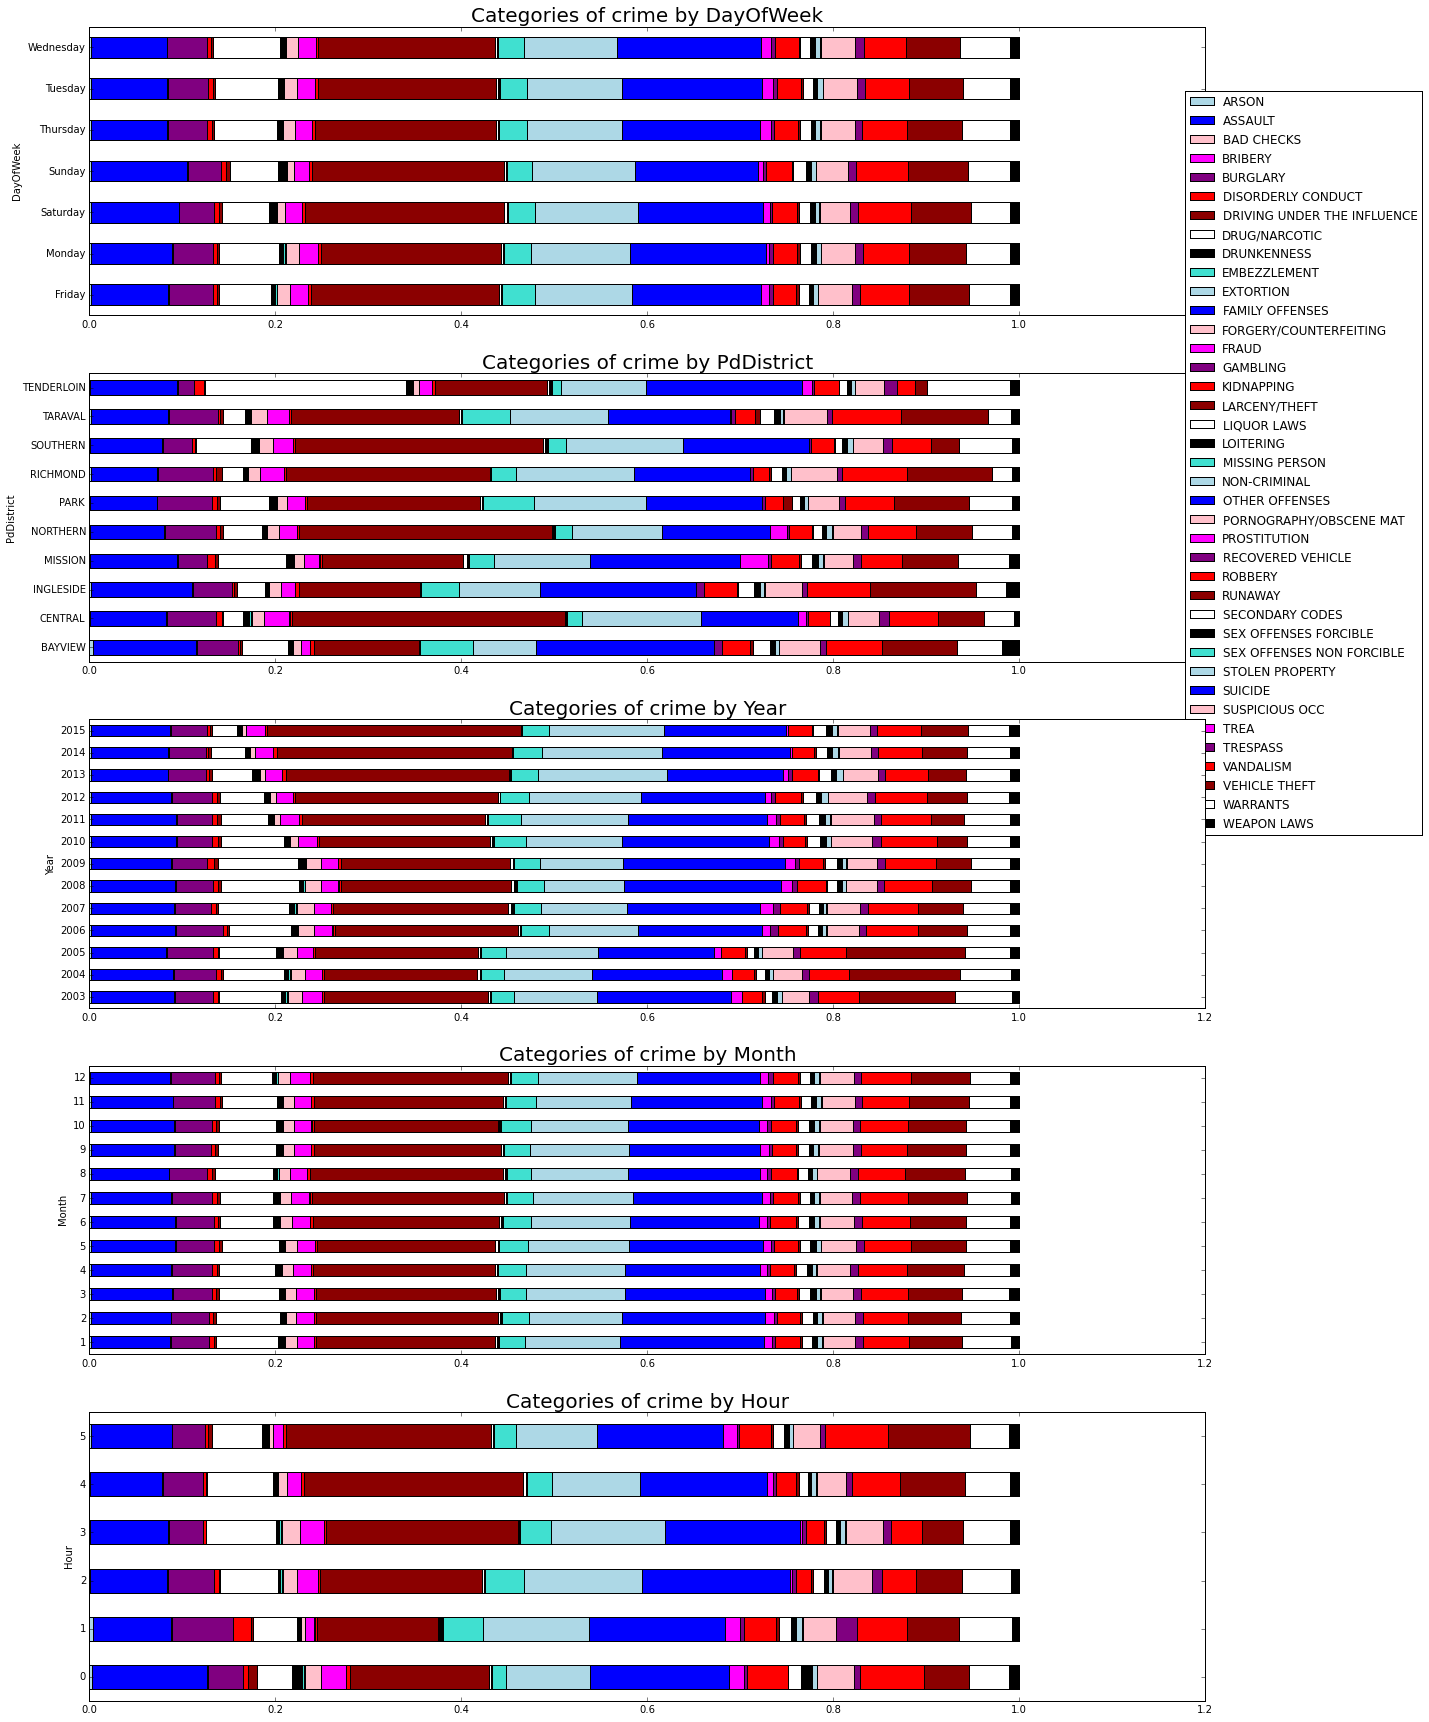

In [8]:
def proportionCrimeCategory(data, discreteParam):
    """
    Extracts proportion of Crimes in the data for the various values of discreteParam
    :param data: input dataframe
    :param discreteParam: name of column of dataframe 
    :return normedtable: Series
            column 1 : index of month
            column 2 : sum of crimes during this month/total numbers of crimes
    """
    by_param = data.groupby([discreteParam, 'Category'])
    #apllying .size() allows to extract number of instances for each Crime Category in each discreteParam
    table = by_param.size()
    #puts it as a 2D table with number of occurences per discreteParam and Crime Category
    d2table = table.unstack()
    #d2table.sum(1) returns the number of crimes in all crime categories per discreteParam
    #1 is for the number of the axe on which the sum is done. Here :Crime Category
    normedtable = d2table.div(d2table.sum(1), axis=0)
    return normedtable
    print(normedtable)
    
discreteParamList = ['DayOfWeek', 'PdDistrict', 'Year','Month','Hour']
fig1, axes1 = plt.subplots(len(discreteParamList),1) #creates a 3x1 blank plot
for i in range(len(discreteParamList)): #now we fill in the subplots
    param = discreteParamList[i]
    table = proportionCrimeCategory(train_data_frame_ret, param)

    ax = axes1[i]
    #create plot title
    ax.set_title("Categories of crime by %s" % discreteParamList[i])
    ax.title.set_fontsize(20)
    #choose colormap (memo : looks ok : none, prism_r)
    #stacked = true, allows to stack the different categories into one bar
    table.plot(kind='barh', stacked=True, ax=axes1[i],figsize=(20,30), color=['lightblue','blue','pink','magenta', 'purple', 'red', 'darkred', 'white', 'black','turquoise'])

    #Puts legend only on second graph and pushes the legend out of plot
    if i==1:
        #how to move legends : http://matplotlib.org/examples/pylab_examples/legend_demo3.html
        ax.legend(bbox_to_anchor=(1.2, 2))

    else:
        ax.legend_.remove()
plt.savefig("graphs/proportions.pdf",format="pdf")